In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

In [101]:
# Read the csv containing fatal accident info
df = pd.read_csv('csv_files/fatal_accidents_2019.csv')

C:\Users\adams\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


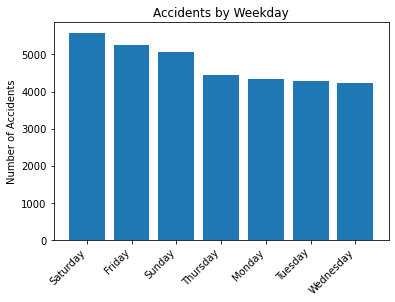

In [102]:
# Get counts for accidents grouped by day of the week
week_days = df.DAY_WEEKNAME.value_counts().keys()
daily_acc = df.DAY_WEEKNAME.value_counts().values

# plot the data
plt.bar(week_days, daily_acc)
plt.xticks(rotation=45, ha ='right')
plt.title('Accidents by Weekday')
plt.ylabel('Number of Accidents')
plt.savefig('figures/weekday_accidents.png', format = 'png')
plt.show()

In [103]:
# Prep data for time of day analysis
# Remove values where no time was recorded
df.ARR_HOUR.value_counts().keys()
fatal_time = df[df.ARR_HOUR != 99]
fatal_time = fatal_time[fatal_time.ARR_HOUR != 88]

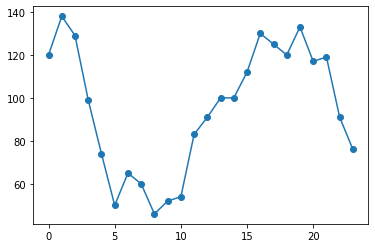

In [104]:
crashes = {'time': fatal_time_day.ARR_HOUR.sort_index().value_counts().keys(),
           'count': fatal_time_day.ARR_HOUR.sort_index().value_counts().values}
crashes = pd.DataFrame(crashes)
crashes = crashes.sort_values(by='time',ascending = True)
plt.scatter(crashes['time'],crashes['count'])
plt.plot(crashes['time'],crashes['count'])

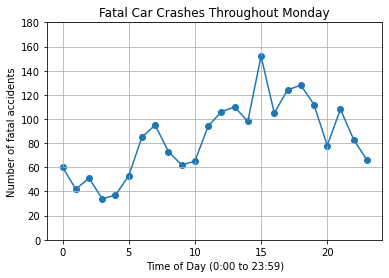

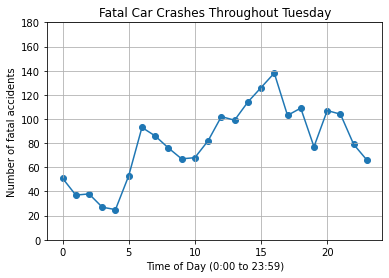

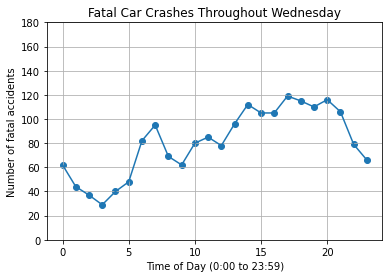

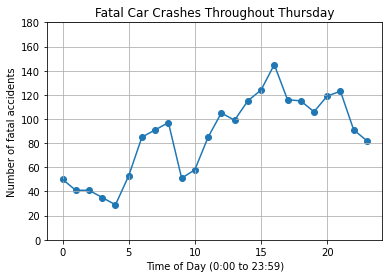

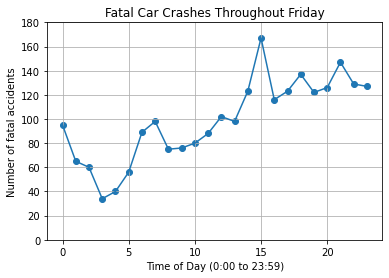

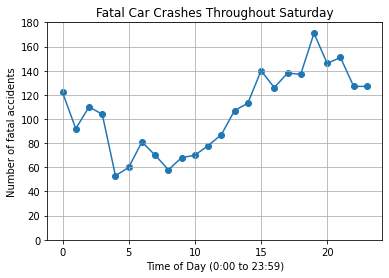

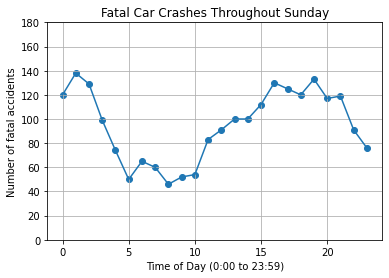

In [105]:
# Generate plots for accidents/time of day for each day of the week
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for day in week_day:
    fatal_time_day = fatal_time[fatal_time.DAY_WEEKNAME == day]
    crashes = {'time': fatal_time_day.ARR_HOUR.sort_index().value_counts().keys(),
               'count': fatal_time_day.ARR_HOUR.sort_index().value_counts().values}
    crashes = pd.DataFrame(crashes)
    crashes = crashes.sort_values(by='time',ascending = True)
    plt.plot(crashes['time'],crashes['count'])
    plt.scatter(crashes['time'],crashes['count'])
    plt.xlabel('Time of Day (0:00 to 23:59)')
    plt.ylabel('Number of fatal accidents')
    plt.grid()
    plt.ylim(0,180)
    plt.title(f'Fatal Car Crashes Throughout {day}')
    #plt.savefig('figures/' + day + '_crashes.png', format = 'png')
    plt.show()

In [106]:
# Create a dataframe with weekdays as columns and time of day as rows
days = ['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
merged_df = pd.DataFrame(fatal_time[fatal_time['DAY_WEEKNAME'] == 'Monday']['ARR_HOUR'].value_counts())
merged_df.columns = ['Monday']
for day in days:
    temp_df = pd.DataFrame(fatal_time[fatal_time['DAY_WEEKNAME'] == day]['ARR_HOUR'].value_counts())
    temp_df.columns = [day]
    merged_df = merged_df.merge(temp_df, left_index = True, right_index =True)
merged_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
15,152,126,105,124,167,140,112
18,128,109,115,115,137,137,120
17,124,103,119,116,123,138,125
19,112,77,110,106,122,171,133
13,110,99,96,99,98,107,100
21,108,104,106,123,147,151,119
12,106,102,78,105,102,87,91
16,105,138,105,145,116,126,130
14,98,114,112,115,123,113,100
7,95,86,95,91,98,70,60


In [107]:
# Sort rows so that 
merged_sorted = merged_df.sort_index()

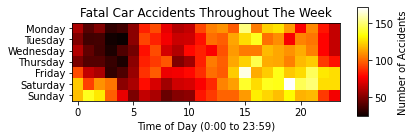

In [108]:
plt.imshow(merged_sorted.transpose(), cmap = 'hot', interpolation='nearest')
plt.colorbar(shrink = 0.5, label='Number of Accidents',aspect=10)
plt.yticks(ticks=range(7), labels=merged_sorted.columns)
plt.xlabel('Time of Day (0:00 to 23:59)')
plt.title('Fatal Car Accidents Throughout The Week')
plt.savefig('figures/weekday_daytime_accident_heatmap.png', format = 'png')
plt.show()